# Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Def. Variables

In [2]:
x=np.linspace(-2,1,100)

def fx(x):
    return 3*(x**5) + 5*(x**4) - (x**3)
    
def dx(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

#  Método Newton-Raphson

In [3]:
def Newt_Raph(f,df,xn,h=1e-6,iter_max=1000,preci=1e-6):
    error=1
    itera=0
    while (error > preci) and (itera < iter_max):
        
        try:
            xn1 = xn - f(xn)/df(f,xn)
            error=np.abs((xn1-xn)/xn)
            
        except ZeroDivisionError:
            print("Imagínate que tienes cero galletas y la repartes entre cero amigos. ¿Cuántas galletas le tocan a cada amigo? No tiene sentido, ¿lo ves? Así que el Monstruo de las galletas está triste porque no tiene galletas y tu estás triste porque no tienes amigos. Intenta otro valor.")
            #Tomado de Siri

        xn = xn1
        itera += 1
    
    if itera == iter_max:
        return False
    else:
        return xn

# Raíces de polinomios

In [4]:
def GetAllRoots(x,f):
    Roots = np.array([])
    
    if f(0) < 1e-10:
        Roots=np.append(Roots,f(0))
    
    for i in x:
        root = Newt_Raph(f,dx,i)
        
        if root != False:
            root = np.round(root,6)
            
            if root not in Roots:
                Roots = np.append(Roots,root)
                
    Roots.sort()
    
    return Roots

# Gráfica

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3500\3014514514.py:8: RuntimeWarning: invalid value encountered in double_scalars
  error=np.abs((xn1-xn)/xn)


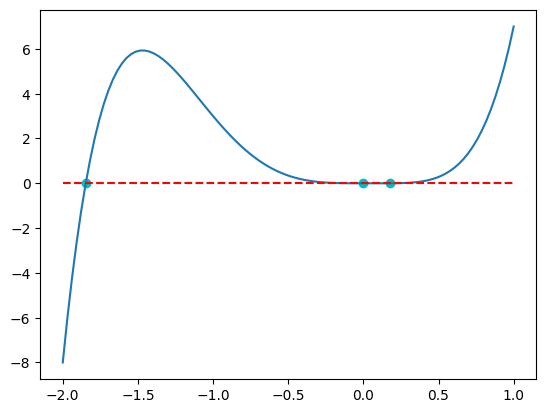

In [5]:
roots=GetAllRoots(x,fx)
fig,ax=plt.subplots()
ax.plot(x, [fx(i) for i in x])
ax.plot(x, [0 for i in x], "--r")
ax.scatter(roots, np.zeros(shape=(len(roots))), c="c")
plt.show()